In [4]:
import pandas as pd

# Load the data into a Pandas dataframe
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Extract two dataframes with the four features of interest and DEATH_EVENT
df0 = data.loc[data['DEATH_EVENT'] == 0, ['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]
df1 = data.loc[data['DEATH_EVENT'] == 1, ['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]

df0.head()


,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
14,80,1.0,138,427000.0,0
20,52,1.3,137,276000.0,0
23,63,0.8,135,368000.0,0
33,159,1.2,138,302000.0,0
38,2656,2.3,137,305000.0,0


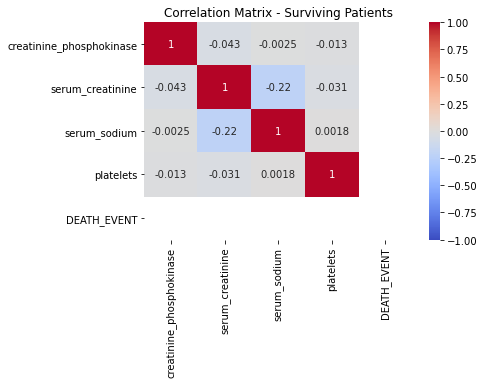

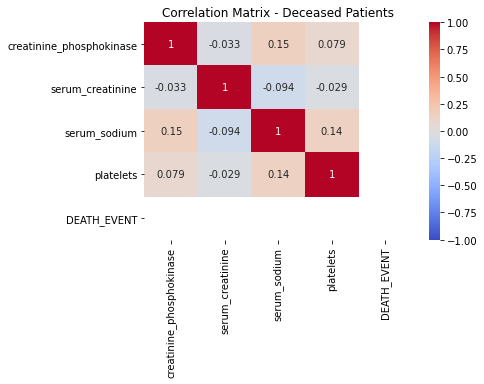

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Construct correlation matrix plots for df0 and df1
corr0 = df0.corr()
sns.heatmap(corr0, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Surviving Patients')
plt.savefig('corr_surviving.png')
plt.show()

corr1 = df1.corr()
sns.heatmap(corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Deceased Patients')
plt.savefig('corr_deceased.png')
plt.show()

In [8]:
#3333 todo

In [11]:
mean0 = df0.mean().round(2)
std0 = df0.std().round(2)
mean1 = df1.mean().round(2)
std1 = df1.std().round(2)

# Create a summary table
summary = pd.DataFrame({'Feature': ['f1', 'f2', 'f3', 'f4'],
                        'Mean (Surviving Patients)': mean0.values[:-1],
                        'Std (Surviving Patients)': std0.values[:-1],
                        'Mean (Deceased Patients)': mean1.values[:-1],
                        'Std (Deceased Patients)': std1.values[:-1]})
summary

,Feature,Mean (Surviving Patients),Std (Surviving Patients),Mean (Deceased Patients),Std (Deceased Patients)
0,f1,540.05,753.80,670.20,1316.58
1,f2,1.18,0.65,1.84,1.47
2,f3,137.22,3.98,135.38,5.00
3,f4,266657.49,97531.20,256381.04,98525.68


In [16]:
df_all = data.loc[:, ['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets', 'DEATH_EVENT']]
df_all.shape

(299, 5)

In [19]:
mean_all = df_all.mean().round(2)
std_all = df_all.std().round(2)
{"mean_all":mean_all, "std_all":std_all}

{'mean_all': creatinine_phosphokinase       581.84
 serum_creatinine                 1.39
 serum_sodium                   136.63
 platelets                   263358.03
 DEATH_EVENT                      0.32
 dtype: float64,
 'std_all': creatinine_phosphokinase      970.29
 serum_creatinine                1.03
 serum_sodium                    4.41
 platelets                   97804.24
 DEATH_EVENT                     0.47
 dtype: float64}

In [20]:
# 5  todo

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df_all,hue="DEATH_EVENT")
# plt.show()
df_all.columns

Index(['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium',
       'platelets', 'DEATH_EVENT'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df_all.iloc[:, 0:4], df_all.iloc[:, 4], test_size=0.5, random_state=42)
X_train.shape, df_all.shape

((149, 4), (299, 5))

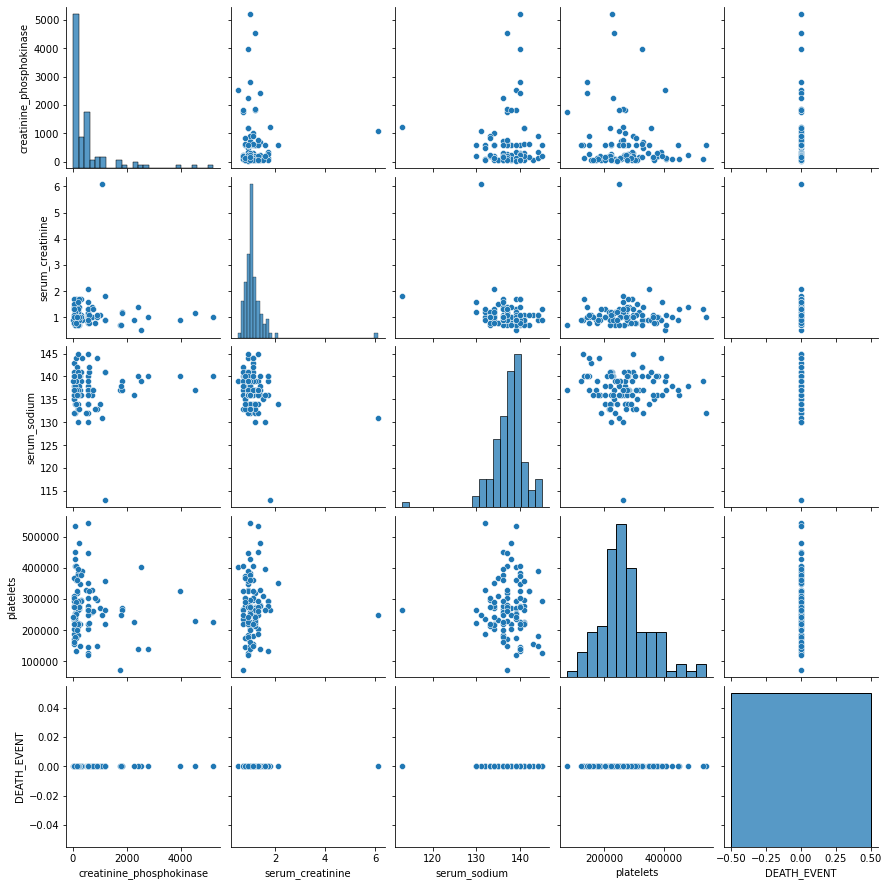

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train_plot = pd.concat([X_train, y_train], axis=1)
X_train_plot_0 = X_train_plot.loc[X_train_plot.DEATH_EVENT==0]
X_train_plot_1 = X_train_plot.loc[X_train_plot.DEATH_EVENT==1]
# print(X_train_plot)


sns.pairplot(X_train_plot_0)
plt.show()

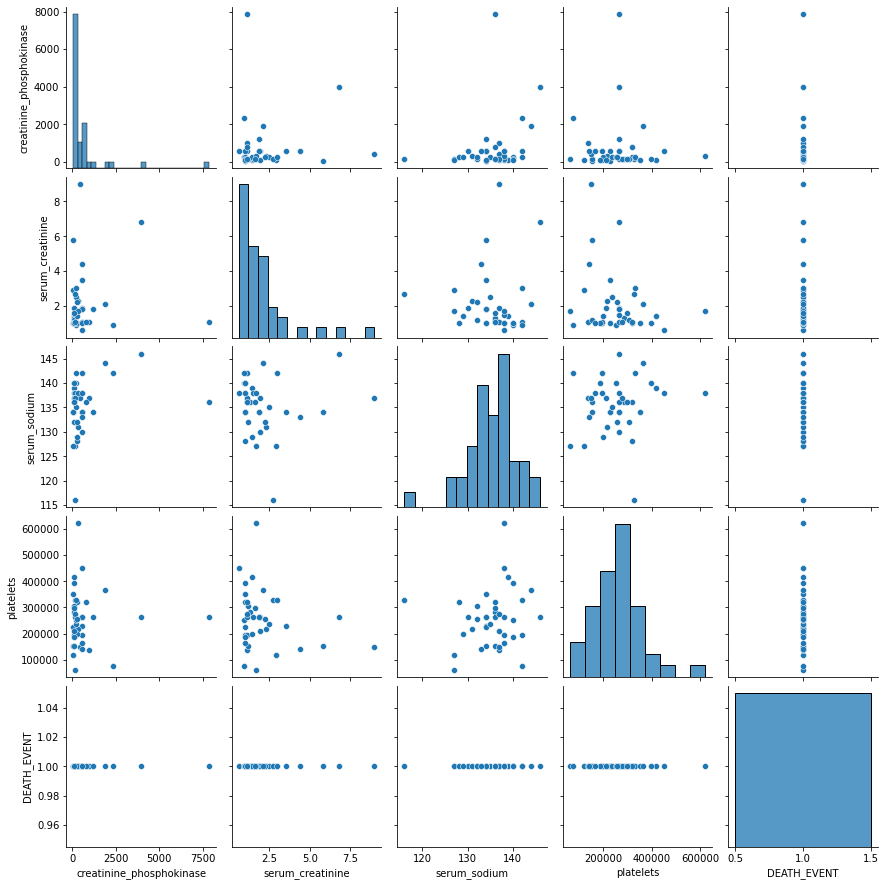

In [38]:
sns.pairplot(X_train_plot_1)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


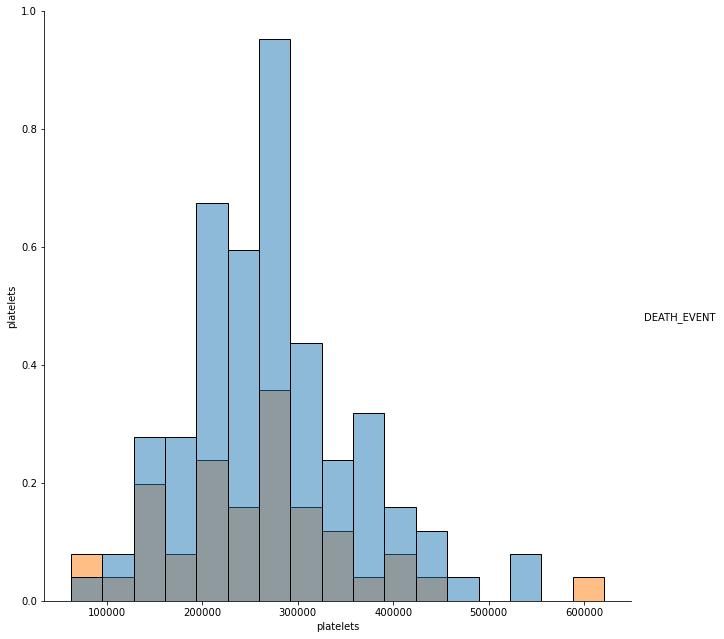

In [59]:
sns.pairplot(X_train_plot[["platelets", "DEATH_EVENT"]], hue="DEATH_EVENT", diag_kind='hist', size=9) #creatinine_phosphokinase  200
# serum_creatinine 1  
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


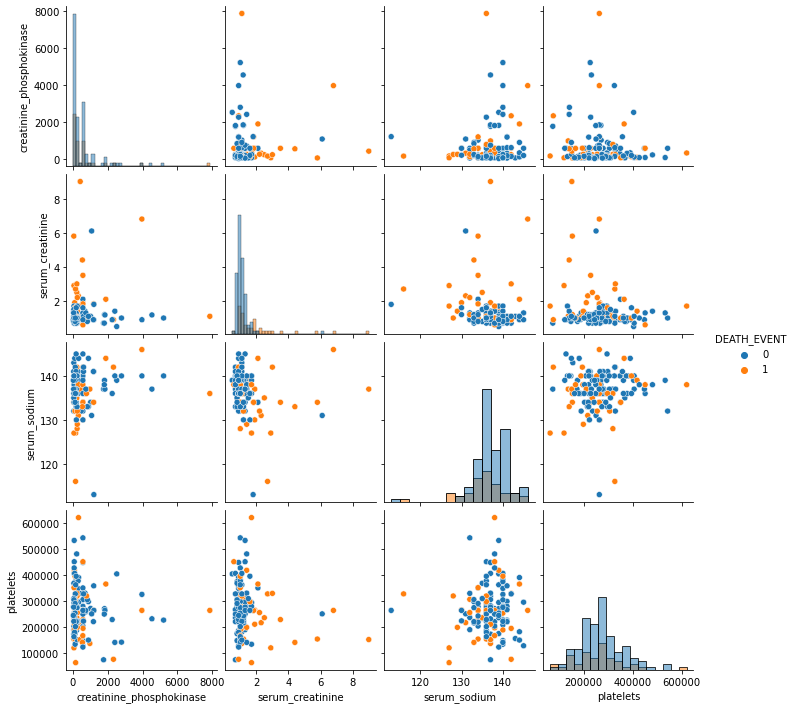

In [63]:
sns.pairplot(X_train_plot, hue="DEATH_EVENT", diag_kind='hist', size=2.5) #creatinine_phosphokinase  200
# serum_creatinine 1  
plt.show()

In [72]:
# 2-2
# your rule may look like this :
def simple_classifier(x):
#     print(x)
    if ( x['creatinine_phosphokinase']  < 200) and (x['serum_creatinine'] < 1):
        return 0
    else :
        return 1

In [76]:
X_test['predicted'] = X_test.apply(simple_classifier, axis=1)

X_test["DEATH_EVNET"] = y_test
X_test.head()
X_test.loc[X_test.predicted == 0].head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,predicted,DEATH_EVNET
173,115,0.8,139,189000.0,0,0
116,96,0.7,136,271000.0,0,0
75,47,0.7,139,204000.0,0,1
118,113,0.9,140,203000.0,0,0
76,92,0.8,140,317000.0,0,0


In [78]:
TP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 1)).sum()
FP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 0)).sum()
TN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 0)).sum()
FN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 1)).sum()

accuracy = (TP + TN) / (TP + FP + TN + FN)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

results = pd.DataFrame({'TP': [TP], 'FP': [FP], 'TN': [TN], 'FN': [FN], 'accuracy': [accuracy], 'TPR': [TPR], 'TNR': [TNR]})
results

,TP,FP,TN,FN,accuracy,TPR,TNR
0,53,81,14,2,0.446667,0.963636,0.147368


In [79]:
# 2-6
if accuracy < 0.5:
    print("worse")
else:
    print("better")

worse


In [88]:
# 3-1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df_all.iloc[:, 0:4], df_all.iloc[:, 4], test_size=0.5, random_state=446)

k_values = [3, 5, 7]
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

accuracy_scores
 

[0.5666666666666667, 0.5333333333333333, 0.5933333333333334]

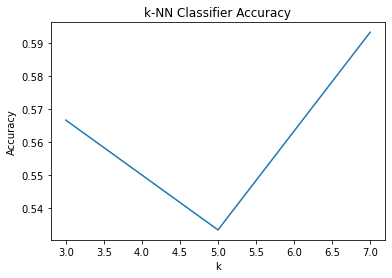

In [89]:
   
import matplotlib.pyplot as plt
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Accuracy')
plt.show()


In [92]:
# 3-3
# best k is 7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy
X_test.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
131,1082,6.10,131,250000.00
26,112,1.00,138,196000.00
101,582,1.18,137,263358.03
94,144,0.70,142,327000.00
297,2413,1.40,140,140000.00


In [94]:
X_test['predicted'] = y_pred
X_test.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,predicted
131,1082,6.10,131,250000.00,0
26,112,1.00,138,196000.00,0
101,582,1.18,137,263358.03,0
94,144,0.70,142,327000.00,0
297,2413,1.40,140,140000.00,0


In [95]:
X_test["DEATH_EVNET"] = y_test
X_test.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,predicted,DEATH_EVNET
131,1082,6.10,131,250000.00,0,0
26,112,1.00,138,196000.00,0,1
101,582,1.18,137,263358.03,0,0
94,144,0.70,142,327000.00,0,0
297,2413,1.40,140,140000.00,0,0


In [96]:

TP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 1)).sum()
FP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 0)).sum()
TN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 0)).sum()
FN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 1)).sum()

accuracy = (TP + TN) / (TP + FP + TN + FN)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

results = pd.DataFrame({'TP': [TP], 'FP': [FP], 'TN': [TN], 'FN': [FN], 'accuracy': [accuracy], 'TPR': [TPR], 'TNR': [TNR]})
results

,TP,FP,TN,FN,accuracy,TPR,TNR
0,6,15,83,46,0.593333,0.115385,0.846939


In [97]:
# 3-4
# better

In [103]:
# 4-1
X_train, X_test, y_train, y_test = train_test_split(
    df_all.iloc[:, 0:4], df_all.iloc[:, 4], test_size=0.5, random_state=446)

cols = X_train.columns.tolist()
# print(cols)
for col in cols: # f1, f2,f3, f4
    # col = f2
    X_train_subset_cols = cols.copy()
    X_train_subset_cols.remove(col)
#     print(X_train_subset_cols)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train[X_train_subset_cols], y_train)
    y_pred = knn.predict(X_test[X_train_subset_cols])
    accuracy = accuracy_score(y_test, y_pred)
    print("drop ", col, " col, get acc=", accuracy)

drop  creatinine_phosphokinase  col, get acc= 0.5933333333333334
drop  serum_creatinine  col, get acc= 0.5933333333333334
drop  serum_sodium  col, get acc= 0.5933333333333334
drop  platelets  col, get acc= 0.6466666666666666


In [104]:
# 4-2
# better
#0.593333  --->0.646666666666666

In [105]:
# 4-3

# 4-4

In [107]:
# 5

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    df_all.iloc[:, 0:4], df_all.iloc[:, 4], test_size=0.5, random_state=446)

# train logistic regression classifier on year 1 data
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict( X_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.6533333333333333

In [108]:
X_test['predicted'] = y_test_pred
X_test["DEATH_EVNET"] = y_test

TP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 1)).sum()
FP = ((X_test['predicted'] == 1) & (X_test["DEATH_EVNET"] == 0)).sum()
TN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 0)).sum()
FN = ((X_test['predicted'] == 0) & (X_test["DEATH_EVNET"] == 1)).sum()

accuracy = (TP + TN) / (TP + FP + TN + FN)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

results = pd.DataFrame({'TP': [TP], 'FP': [FP], 'TN': [TN], 'FN': [FN], 'accuracy': [accuracy], 'TPR': [TPR], 'TNR': [TNR]})
results

,TP,FP,TN,FN,accuracy,TPR,TNR
0,0,0,98,52,0.653333,0.0,1.0


In [109]:
# 5-3
# better
# simple 0.446667     
#  lr    0.65
# better

In [110]:
# 5-4
#  lr    0.65

In [111]:
# 6-1
X_train, X_test, y_train, y_test = train_test_split(
    df_all.iloc[:, 0:4], df_all.iloc[:, 4], test_size=0.5, random_state=446)

cols = X_train.columns.tolist()
# print(cols)
for col in cols: # f1, f2,f3, f4
    # col = f2
    X_train_subset_cols = cols.copy()
    X_train_subset_cols.remove(col)
#     print(X_train_subset_cols)
    lr = LogisticRegression()
    lr.fit(X_train[X_train_subset_cols], y_train)
    y_pred = lr.predict(X_test[X_train_subset_cols])
    accuracy = accuracy_score(y_test, y_pred)
    print("drop ", col, " col, get acc=", accuracy)

drop  creatinine_phosphokinase  col, get acc= 0.6533333333333333
drop  serum_creatinine  col, get acc= 0.6533333333333333
drop  serum_sodium  col, get acc= 0.6533333333333333
drop  platelets  col, get acc= 0.6666666666666666


In [112]:
# 6-2
# increase
# 0.653333--->0.666666

In [113]:
# 6-3
# 6-4

In [114]:
#6-5
# lr: 0.666666 - 0.65333
# knn: 0.593333  --->0.646666666666666